In [ ]:
KMeans clustered on clean and pre-processed data with oneHotEncoding features dropped 

# no better score for individual clusters except clusterno.7 (155 samples only) which gave 90% accuracy,
# rest of the clusteres are 86 or 87% or worse
# used gradient boost classifer with best estimated parameters

In [109]:
import pandas as pd
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [110]:
# load data
df = pd.read_csv('./Data_income/clean_data',index_col=0)
df.head(3)

,age,workclass,fnlwgt,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,...,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,39,5,77516.0,13.0,7,4,1,2174.0,0.0,40.0,...,0,1,0,0,0,1,0,0,0,0
1,50,6,83311.0,13.0,15,4,1,0.0,0.0,13.0,...,0,0,0,0,1,0,0,0,0,0
2,38,4,215646.0,9.0,3,4,1,0.0,0.0,40.0,...,0,0,0,0,0,1,0,0,0,0


In [111]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'occupation', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'Y', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife'],
      dtype='object')

In [112]:
corr_matrix = df.corr()
print(corr_matrix["Y"].sort_values(ascending=False))

Y                                        1.000000
marital-status_ Married-civ-spouse       0.445853
relationship_ Husband                    0.403791
occupation                               0.344212
education-num                            0.332613
age                                      0.230369
hours-per-week                           0.227687
capital-gain                             0.223013
sex                                      0.214628
workclass                                0.170452
capital-loss                             0.147554
relationship_ Wife                       0.120484
race                                     0.096204
native-country                           0.094950
marital-status_ Married-AF-spouse        0.008977
fnlwgt                                  -0.006339
marital-status_ Married-spouse-absent   -0.039303
marital-status_ Widowed                 -0.065050
marital-status_ Separated               -0.073583
relationship_ Other-relative            -0.085601


In [113]:
lst1 = list(df.columns)
lst1.remove('Y')
lst11 = lst1[0:14]

# Separate out the target

In [114]:
X = df[lst1]
y = df['Y']
X.head(3)

,age,workclass,fnlwgt,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,...,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,39,5,77516.0,13.0,7,4,1,2174.0,0.0,40.0,...,0,1,0,0,0,1,0,0,0,0
1,50,6,83311.0,13.0,15,4,1,0.0,0.0,13.0,...,0,0,0,0,1,0,0,0,0,0
2,38,4,215646.0,9.0,3,4,1,0.0,0.0,40.0,...,0,0,0,0,0,1,0,0,0,0


In [115]:
y.shape, X.shape

((48842,), (48842, 24))

In [116]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
# Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# KMeans clustering 

In [102]:
from sklearn.cluster import KMeans

In [117]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans


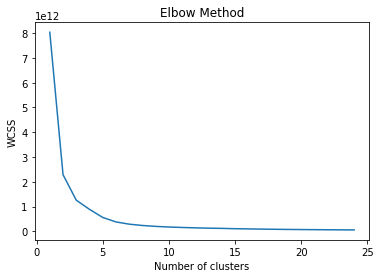

In [104]:
wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 25), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [118]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

In [119]:
kmeans.labels_

array([2, 2, 3, ..., 1, 2, 0], dtype=int32)

In [120]:
lst1 = kmeans.labels_
lst1

array([2, 2, 3, ..., 1, 2, 0], dtype=int32)

In [121]:
len(lst1),X.shape

(48842, (48842, 24))

In [122]:
df['Lables'] = lst1

In [148]:

df4 = df[df['Lables']== 3]
df5 = df[(df['Lables']== 4)|(df['Lables']== 0) | (df['Lables']== 1)|(df['Lables']== 2)]

 
df4.shape,df5.shape

((9705, 26), (39137, 26))

In [149]:
# df1.shape,df2.shape,df3.shape,df4.shape,df5.shape

In [164]:
lst1 = list(df.columns)
lst1.remove('Y')
lst11 = lst1[0:14]

In [175]:
X = df[lst1]
y = df['Y']
X.head(3)

,age,workclass,fnlwgt,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,...,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,Lables
0,39,5,77516.0,13.0,7,4,1,2174.0,0.0,40.0,...,1,0,0,0,1,0,0,0,0,2
1,50,6,83311.0,13.0,15,4,1,0.0,0.0,13.0,...,0,0,0,1,0,0,0,0,0,2
2,38,4,215646.0,9.0,3,4,1,0.0,0.0,40.0,...,0,0,0,0,1,0,0,0,0,3


In [176]:
X.shape,y.shape

((48842, 25), (48842,))

In [189]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
# Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [190]:
gb_clf2 = GradientBoostingClassifier(n_estimators=197, min_samples_leaf=50, learning_rate=0.25, max_depth=3, random_state=42)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))



Confusion Matrix:
[[10489   670]
 [ 1216  2278]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11159
           1       0.77      0.65      0.71      3494

    accuracy                           0.87     14653
   macro avg       0.83      0.80      0.81     14653
weighted avg       0.87      0.87      0.87     14653



In [191]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print([tp,fp])
print([fn,tn])

[2278, 670]
[1216, 10489]


In [192]:
error = (fp+fn)/(fp+fn+tp+tn)
error

0.12871084419572784

In [ ]:
#  best with Kmeans very close to without Kmeans : so far (17:30 on Friday)

In [182]:
gb_clf2 = GradientBoostingClassifier(n_estimators=197, min_samples_leaf=50, learning_rate=0.25, max_depth=3, random_state=42)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))



Confusion Matrix:
[[10437   633]
 [ 1217  2366]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11070
           1       0.79      0.66      0.72      3583

    accuracy                           0.87     14653
   macro avg       0.84      0.80      0.82     14653
weighted avg       0.87      0.87      0.87     14653



In [183]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print([tp,fp])
print([fn,tn])

[2366, 633]
[1217, 10437]


In [184]:
error = (fp+fn)/(fp+fn+tp+tn)
error

0.12625400941786666

In [156]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print([tp,fp])
print([fn,tn])

[1860, 504]
[992, 8386]


In [157]:
error = (fp+fn)/(fp+fn+tp+tn)
error

0.12740589337421224

In [97]:
tp = (1897+ 392)
tn = (8329+2162)

fn = (1019+238)
fp = (497+120)

error = (fp+fn)/(fp+fn+tp+tn)
error

0.127883171830217

In [ ]:
0.12970533128938852

# Adaboost

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=200,learning_rate=0.05, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [15]:
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8670215488560168


In [16]:
X.shape

(48842, 24)

In [17]:
X_test.shape, X_train.shape

((19537, 24), (29305, 24))

In [24]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
# X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:34200], X[34200:]
y_train, y_test = y[:34200], y[34200:]


clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=2, min_samples_leaf=5, random_state=42).fit(X_train, y_train)
clf.score(X_test, y_test)


0.8742658106816009

In [19]:
gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=42)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix:
[[10487   709]
 [ 1191  2255]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11196
           1       0.76      0.65      0.70      3446

    accuracy                           0.87     14642
   macro avg       0.83      0.80      0.81     14642
weighted avg       0.87      0.87      0.87     14642



In [20]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=150, learning_rate=learning_rate, max_depth=3, random_state=42)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.869
Accuracy score (validation): 0.870
Learning rate:  0.075
Accuracy score (training): 0.871
Accuracy score (validation): 0.871
Learning rate:  0.1
Accuracy score (training): 0.874
Accuracy score (validation): 0.872
Learning rate:  0.25
Accuracy score (training): 0.883
Accuracy score (validation): 0.876
Learning rate:  0.5
Accuracy score (training): 0.892
Accuracy score (validation): 0.872
Learning rate:  0.75
Accuracy score (training): 0.893
Accuracy score (validation): 0.869
Learning rate:  1
Accuracy score (training): 0.892
Accuracy score (validation): 0.867


In [21]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=150, min_samples_leaf=5, learning_rate=learning_rate, max_depth=3, random_state=42)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.869
Accuracy score (validation): 0.870
Learning rate:  0.075
Accuracy score (training): 0.872
Accuracy score (validation): 0.871
Learning rate:  0.1
Accuracy score (training): 0.874
Accuracy score (validation): 0.873
Learning rate:  0.25
Accuracy score (training): 0.883
Accuracy score (validation): 0.875
Learning rate:  0.5
Accuracy score (training): 0.890
Accuracy score (validation): 0.874
Learning rate:  0.75
Accuracy score (training): 0.894
Accuracy score (validation): 0.869
Learning rate:  1
Accuracy score (training): 0.893
Accuracy score (validation): 0.867


In [36]:
gb_clf2 = GradientBoostingClassifier(n_estimators=150, min_samples_leaf=5, learning_rate=0.25, max_depth=3, random_state=42)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix:
[[10552   644]
 [ 1187  2259]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11196
           1       0.78      0.66      0.71      3446

    accuracy                           0.87     14642
   macro avg       0.84      0.80      0.82     14642
weighted avg       0.87      0.87      0.87     14642



In [37]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print([tp,fp])
print([fn,tn])

[2259, 644]
[1187, 10552]


In [38]:
error = (fp+fn)/(fp+fn+tp+tn)
error

0.12505122251058598

class sklearn.ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)[source]

#  GridSearch 

In [61]:
X_train.shape,y_train.shape

((34200, 24), (34200,))

In [29]:
from sklearn.model_selection import GridSearchCV


In [32]:
param_grid_search = {"min_samples_split": [2,4,6,8,10],
                     "min_samples_leaf": [10,25,35,50,55,60,75],
                     "n_estimators" : [180,190,200,210,225,250],
                     "learning_rate" : [0.25],
                     "max_depth" : [3,4,5,6,7,8],
                     "subsample" : [0.6,0.7,0.8,0.9]
                    }

In [33]:

model = GradientBoostingClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid_search, cv=5, verbose=5, n_jobs= -1)
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  7.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...
                                                  presort='auto',
  

In [34]:
print(grid.best_params_)

{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'n_estimators': 200, 'subsample': 1.0}


# best error yet

In [100]:
gb_clf2 = GradientBoostingClassifier(n_estimators=197, min_samples_leaf=50, learning_rate=0.25, max_depth=3, random_state=42)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix:
[[10555   641]
 [ 1171  2275]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11196
           1       0.78      0.66      0.72      3446

    accuracy                           0.88     14642
   macro avg       0.84      0.80      0.82     14642
weighted avg       0.87      0.88      0.87     14642



In [101]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print([tp,fp])
print([fn,tn])

[2275, 641]
[1171, 10555]


In [102]:
error = (fp+fn)/(fp+fn+tp+tn)
error

0.12375358557574102

best error = 0.12375358557574102
best parameter set: >>> gb_clf2 = GradientBoostingClassifier(n_estimators=197, min_samples_leaf=50,
                                     learning_rate=0.25, max_depth=3, random_state=42)

Confusion Matrix:
[[10555   641]
 [ 1171  2275]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11196
           1       0.78      0.66      0.72      3446

    accuracy                           0.88     14642
   macro avg       0.84      0.80      0.82     14642
weighted avg       0.87      0.88      0.87     14642


gb_clf2 = GradientBoostingClassifier(n_estimators=197, min_samples_leaf=50,
                                     learning_rate=0.25, max_depth=3, random_state=42)


class sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)